Custom Dimensional Weight Divisor : 257

The incentives stated above are valid from July 27, 2019 to June 29, 2024.

Instructions

https://billing.ups.com/home

    click on my invoices

    export data to table to create the helpful one

    download documents to create the detailed one


https://docs.google.com/document/d/1X_ptuq2UsNBSR3m1nW-qWsye34lB7soxKTAYMYcmDEM/edit?usp=sharing

https://www.ups.com/assets/resources/media/en_US/SurePost_Terms.pdf -- Surepost terms


In [38]:
# Imports
#import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 60)

In [39]:
# header list from UPS for full 250 column invoice CSV
header_list = ["Version","Recipient Number","Account Number","Account Country/Territory","Invoice Date","Invoice Number",
               "Invoice Type Code","Invoice Type Detail Code","Account Tax ID","Invoice Currency Code","Invoice Amount",
               "Transaction Date","Pickup Record Number","Lead Shipment Number","World Ease Number",
               "Shipment Reference Number 1","Shipment Reference Number 2","Bill Option Code","Package Quantity",
               "Oversize Quantity","Tracking Number","Package Reference Number 1","Package Reference Number 2",
               "Package Reference Number 3","Package Reference Number 4","Package Reference Number 5","Entered Weight",
               "Entered Weight Unit of Measure","Billed Weight","Billed Weight Unit of Measure","Container Type",
               "Billed Weight Type","Package Dimensions","Zone","Charge Category Code","Charge Category Detail Code",
               "Charge Source","Type Code 1","Type Detail Code 1","Type Detail Value 1","Type Code 2","Type Detail Code 2",
               "Type Detail Value 2","Charge Classification Code","Charge Description Code","Charge Description",
               "Charged Unit Quantity","Basis Currency Code","Basis Value","Tax Indicator","Transaction Currency Code",
               "Incentive Amount","Net Amount","Miscellaneous Currency Code","Miscellaneous Incentive Amount",
               "Miscellaneous Net Amount","Alternate Invoicing Currency Code","Alternate Invoice Amount",
               "Invoice Exchange Rate","Tax Variance Amount","Currency Variance Amount","Invoice Level Charge",
               "Invoice Due Date","Alternate Invoice Number","Store Number","Customer Reference Number","Sender Name",
               "Sender Company Name","Sender Address Line 1","Sender Address Line 2","Sender City","Sender State",
               "Sender Postal","Sender Country/Territory","Receiver Name","Receiver Company Name","Receiver Address Line 1",
               "Receiver Address Line 2","Receiver City","Receiver State","Receiver Postal","Receiver Country/Territory",
               "Third Party Name","Third Party Company Name","Third Party Address Line 1","Third Party Address Line 2",
               "Third Party City","Third Party State","Third Party Postal","Third party Country/Territory","Sold To Name",
               "Sold To Company Name","Sold To Address Line 1","Sold To Address Line 2","Sold To City","Sold To State",
               "Sold To Postal","Sold to Country/Territory","Miscellaneous Address Qual 1","Miscellaneous Address 1 Name",
               "Miscellaneous Address 1 Company Name","Miscellaneous Address 1 Address Line 1",
               "Miscellaneous Address 1 Address Line 2","Miscellaneous Address 1 City","Miscellaneous Address 1 State",
               "Miscellaneous Address 1 Postal","Miscellaneous address 1 Country/Territory","Miscellaneous Address Qual 2",
               "Miscellaneous Address 2 Name","Miscellaneous Address 2 Company Name","Miscellaneous Address 2 Address Line 1",
               "Miscellaneous Address 2 Address Line 2","Miscellaneous Address 2 City","Miscellaneous Address 2 State",
               "Miscellaneous Address 2 Postal","Miscellaneous address 2 Country/Territory","Shipment Date",
               "Shipment Export Date","Shipment Import Date","Entry Date","Direct Shipment Date","Shipment Delivery Date",
               "Shipment Release Date","Cycle Date","EFT Date","Validation Date","Entry Port","Entry Number","Export Place",
               "Shipment Value Amount","Shipment Description","Entered Currency Code","Customs Number","Exchange Rate",
               "Master Air Waybill Number","EPU","Entry Type","CPC Code","Line Item Number","Goods Description","Entered Value",
               "Duty Amount","Weight","Unit of Measure","Item Quantity","Item Quantity Unit of Measure","Import Tax ID",
               "Declaration Number","Carrier Name/Clinical Trial Identification Number/SDS ID ","CCCD Number","Cycle Number",
               "Foreign Trade Reference Number","Job Number","Transport Mode","Tax Type","Tariff Code","Tariff Rate",
               "Tariff Treatment Number","Contact Name","Class Number","Document Type","Office Number","Document Number",
               "Duty Value","Total Value for Duty","Excise Tax Amount","Excise Tax Rate","GST Amount","GST Rate",
               "Order In Council","Origin Country/Territory","SIMA Access","Tax Value","Total Customs Amount",
               "Miscellaneous Line 1","Miscellaneous Line 2","Miscellaneous Line 3","Miscellaneous Line 4",
               "Miscellaneous Line 5","Payor Role Code","Miscellaneous Line 7","Miscellaneous Line 8","Miscellaneous Line 9",
               "Miscellaneous Line 10","Miscellaneous Line 11","Duty Rate","VAT Basis Amount","VAT Amount","VAT Rate",
               "Other Basis Amount","Other Amount","Other Rate","Other Customs Number Indicator","Other Customs Number",
               "Customs Office Name","Package Dimension Unit Of Measure","Original Shipment Package Quantity","Corrected Zone",
               "Tax Law Article Number","Tax Law Article Basis Amount","Original tracking number","Scale weight quantity",
               "Scale Weight Unit of Measure","Raw dimension unit of measure","Raw dimension length","BOL # 1","BOL # 2",
               "BOL # 3","BOL # 4","BOL # 5","PO # 1","PO # 2","PO # 3","PO # 4","PO # 5","PO # 6","PO # 7","PO # 8",
               "PO # 9","PO # 10","NMFC","Detail Class","Freight Sequence Number","Declared Freight Class","EORI Number",
               "Detail Keyed Dim","Detail Keyed Unit of Measure","Detail Keyed Billed Dimension","Detail Keyed Billed Unit of Measure",
               "Original Service Description","Promo Discount Applied Indicator","Promo Discount Alias","SDS Match Level Cd",
               "SDS RDR Date","SDS Delivery Date","SDS Error Code","Place Holder 46","Place Holder 47","Place Holder 48",
               "SCC Scale Weight","Place Holder 50","Place Holder 51","Place Holder 52","Place Holder 53","Place Holder 54",
               "Place Holder 55","Place Holder 56","Place Holder 57","Place Holder 58","Place Holder 59"]

In [40]:
# remove spaces from column name list 
header_list = [x.replace(' ', '_') for x in header_list]

# lowercase 
header_list = [x.lower() for x in header_list]

In [41]:
# All full invoice files 
extension = 'csv'
all_filenames = [i for i in glob.glob('Invoice_*.{}'.format(extension))]

In [42]:
list_of_dfs = []
for file in all_filenames:
    df = pd.read_csv(file, names=header_list, encoding='windows-1252', low_memory=False)
    df['detail_keyed_dim'] = df['detail_keyed_dim'].bfill()
    list_of_dfs.append(df)

df_master = pd.concat(list_of_dfs, ignore_index=True) 

In [43]:
print(df_master.shape)
df_master.head()
df = df_master

(88405, 250)


In [44]:
# drop static and null columns 
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

# drop personally identifiable info
df.drop(['receiver_company_name', 'receiver_address_line_1', 'receiver_address_line_2'], axis=1, inplace=True)

# add fuel surcharge as a feature 
df['fuel_cost'] = df.loc[df['charge_description'] == 'Fuel Surcharge']['net_amount']


df_detailed = df

In [45]:
df_detailed.head(2)
print(df_detailed.shape)

(88405, 112)


In [46]:
# merge in invoice summary to catch occational missing adjustment 
all_filenames = [i for i in glob.glob('000000R4R346*.{}'.format(extension))]

list_of_dfs_1 = []
for file in all_filenames:
    df = pd.read_csv(file)
    list_of_dfs_1.append(df)

df_condenced = pd.concat(list_of_dfs_1, ignore_index=True) 
df_condenced = df_condenced[df_condenced.columns.drop(["Ref No 2", 'Type', 'System'])]
df_condenced.columns = df_condenced.columns.str.replace(' ', '_')
df_condenced.columns = df_condenced.columns.str.lower()
df_condenced.head(2)

,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1
0,1ZR4R346YW90072441,"Dec 21, 2021",UPS SurePost - 1 LB or Greater,$19.38,-$3.87,$15.51,3134770
1,1ZR4R346YW90135892,"Dec 28, 2021",UPS SurePost - 1 LB or Greater,$20.62,-$3.37,$17.25,3135116


In [47]:
# https://pbpython.com/pandas_dtypes.html
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

df_condenced['net_charge'] = df_condenced['net_charge'].apply(convert_currency)

In [48]:
# data consolidation -- extra column removal 
inspect = df_detailed[['billed_weight', 'package_quantity', 'zone','receiver_city',
                                          'receiver_state', 'receiver_postal', 'tracking_number', 'fuel_cost']].groupby(by='tracking_number', dropna=True).max()

# merge cleaner columns with summary invoice data 
df_clean = pd.merge(df_condenced,inspect[['billed_weight', 'package_quantity', 'zone','receiver_city',
                                          'receiver_state', 'receiver_postal', 'fuel_cost']], on ='tracking_number', how='inner')

In [49]:
# Merge detail keyed dim
df_clean = pd.merge(df_clean,df_detailed[['tracking_number', 'detail_keyed_dim']], 
                                    on ='tracking_number', how='inner')

# drop duplicates 
df_clean.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [50]:
# clean data 
df_clean['published_charge'] = df_clean['published_charge'].apply(convert_currency)
df_clean['incentive_charge'] = df_clean['incentive_charge'].apply(convert_currency)
df_clean['transaction_date'] = pd.to_datetime(df_clean['transaction_date'])

# zip code 5 digit
df_clean['receiver_postal'] = df_clean['receiver_postal'].astype(int).astype(str).str.zfill(5)
df_clean['receiver_postal'] = df_clean['receiver_postal'].map(str)
df_clean['receiver_postal'] = df_clean['receiver_postal'].str[:5]

df_clean['ref_no_1'] = df_clean['ref_no_1'].astype(str)
df_clean['ref_no_1'] = df_clean['ref_no_1'].str[:7]

# drop international shipment
df_clean = df_clean[df_clean['service_code'] != 'Worldwide Saver']

df_clean.head(2)

,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1,billed_weight,package_quantity,zone,receiver_city,receiver_state,receiver_postal,fuel_cost,detail_keyed_dim
0,1ZR4R346YW90072441,2021-12-21,UPS SurePost - 1 LB or Greater,19.38,-3.87,15.51,3134770,9.0,1,7.0,Halethorpe,MD,21227,1.54,15.0x 15.0x 10.0
1,1ZR4R346YW90135892,2021-12-28,UPS SurePost - 1 LB or Greater,20.62,-3.37,17.25,3135116,5.0,1,5.0,Woodstock,IL,60098,1.71,14.0x 14.0x 6.0


In [51]:
# Total Cost Per Shipment w/ adjustments and fuel surcharge
df_tot_cost = pd.DataFrame()
df_tot_cost['total_cost'] = df_detailed[['tracking_number', 'net_amount']].groupby(by = 'tracking_number').sum()
df_tot_cost.rename_axis("tracking_number")


# Merge adjustments onto dataframe
df_clean = pd.merge(df_clean,df_tot_cost['total_cost'], on ='tracking_number', how='inner')
df_clean['adjustment'] = round((df_clean['total_cost'] - df_clean['net_charge']), 2)

In [52]:
############ DISTANCE DATA ################

# read in existing distance data 
dist = pd.read_csv('dist.csv')
dist['receiver_postal'] = dist['receiver_postal'].astype(int).astype(str).str.zfill(5)
auxiliaryList = dist['receiver_postal'].tolist()

# append new zip codes 
zip_codes = df_clean['receiver_postal'].unique()
zip_codes


for code in zip_codes:
    if code not in auxiliaryList:
        auxiliaryList.append(code)

# merge on existing data 
dist_master = pd.DataFrame (auxiliaryList, columns = ['receiver_postal'])
dist_master = dist_master.merge(dist, on='receiver_postal', how='left')

dist_missing = dist_master[dist_master['distance_mi'].isnull()]
dist_missing.reset_index(inplace=True)

# Calculate distance for missing zipcodes 
import pgeocode
dist = pgeocode.GeoDistance('US')

miles = []
i = 1
for i in range(len(dist_missing)):
    dist = pgeocode.GeoDistance('US')
    zip_code = dist_missing.loc[i, 'receiver_postal']
    mi = dist.query_postal_code("80231", zip_code)
    miles.append(round(mi, 2))
    
dist_missing['distance_mi'] = miles

# drop na 
dist_master.dropna(subset=['distance_mi'], inplace=True)

# concat 
dist_master = pd.concat([dist_master, dist_missing], ignore_index=True)

#clean
dist_master.dropna(subset=['distance_mi'], inplace=True)
dist_master = dist_master[['receiver_postal', 'distance_mi']]

# export for future input 
dist_master.to_csv('dist.csv', header=True, index=False)

# need to merge onto dfclean
df_clean = pd.merge(df_clean, dist_master, how='outer')

C:\Users\evana\AppData\Local\Temp\ipykernel_11972\4271161244.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_missing['distance_mi'] = miles


In [53]:
# create copy, drop dups, and sort 
df = df_clean.copy()
df.drop_duplicates(subset=['tracking_number'], keep='first', inplace=True)
df = df.sort_values(by=['transaction_date'], ascending=False)

In [54]:
# feature creation week of year 
# https://stackabuse.com/how-to-format-dates-in-python/

df['week_of_year'] = df['transaction_date'].dt.strftime('%W')
df['month'] = df['transaction_date'].dt.strftime('%m')

In [55]:
box_volume_map = {'15.0x 15.0x  6.0':1350,
'15.0x 15.0x 10.0':2250,
'14.0x 14.0x  4.0':784,
'14.0x  8.0x  4.0':448,
'14.0x 14.0x  6.0':1176,
'14.0x  8.0x  6.0':672,
'10.0x 10.0x  3.0':300,
'10.0x  8.0x  6.0':480,
'16.0x 16.0x  7.0':1792,
'15.0x 15.0x  8.0':1800,
'22.0x 18.0x 17.0':6732,
'21.0x 15.0x  6.0':1890,
'14.0x 10.0x  3.0':420,
'24.0x 16.0x  7.0':2688,
'12.0x  9.0x  2.0':216,
'15.0x 11.0x 10.0':1650,
'17.0x 17.0x 12.0':3468}

df['volume'] = df.detail_keyed_dim.map(box_volume_map)
df.head()

,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1,billed_weight,package_quantity,zone,receiver_city,receiver_state,receiver_postal,fuel_cost,detail_keyed_dim,total_cost,adjustment,distance_mi,week_of_year,month,volume
21373,1ZR4R346YW93412667,2022-12-01,UPS SurePost - 1 LB or Greater,19.07,-3.83,15.24,3166291,9.0,1,5.0,DALLAS,TX,75205,2.21,15.0x 15.0x 10.0,15.24,-0.0,1051.82,48,12,2250.0
14988,1ZR4R346YW92620505,2022-12-01,UPS SurePost - 1 LB or Greater,15.17,-3.04,12.13,3166265,9.0,1,2.0,BOULDER,CO,80304,1.76,15.0x 15.0x 10.0,12.13,-0.0,52.06,48,12,2250.0
1455,1ZR4R346YW90778279,2022-12-01,UPS SurePost - 1 LB or Greater,19.07,-3.83,15.24,3166292,9.0,1,5.0,PALATINE,IL,60067,2.21,15.0x 15.0x 10.0,15.24,-0.0,1438.70,48,12,2250.0
20089,1ZR4R346YW97699931,2022-12-01,UPS SurePost - 1 LB or Greater,13.79,-2.76,11.03,3166261,6.0,1,2.0,DENVER,CO,80205,1.60,15.0x 15.0x 6.0,11.03,0.0,11.29,48,12,1350.0
25033,1ZR4R346YW93491091,2022-12-01,UPS SurePost - 1 LB or Greater,23.05,-3.83,19.22,3166263,9.0,1,5.0,NEWAYGO,MI,49337,2.79,15.0x 15.0x 10.0,19.22,0.0,1640.88,48,12,2250.0


In [56]:
# output to CSV
df.to_csv("ups_output.csv", header=True, index=False)

#create copy of df 
df_clean = df

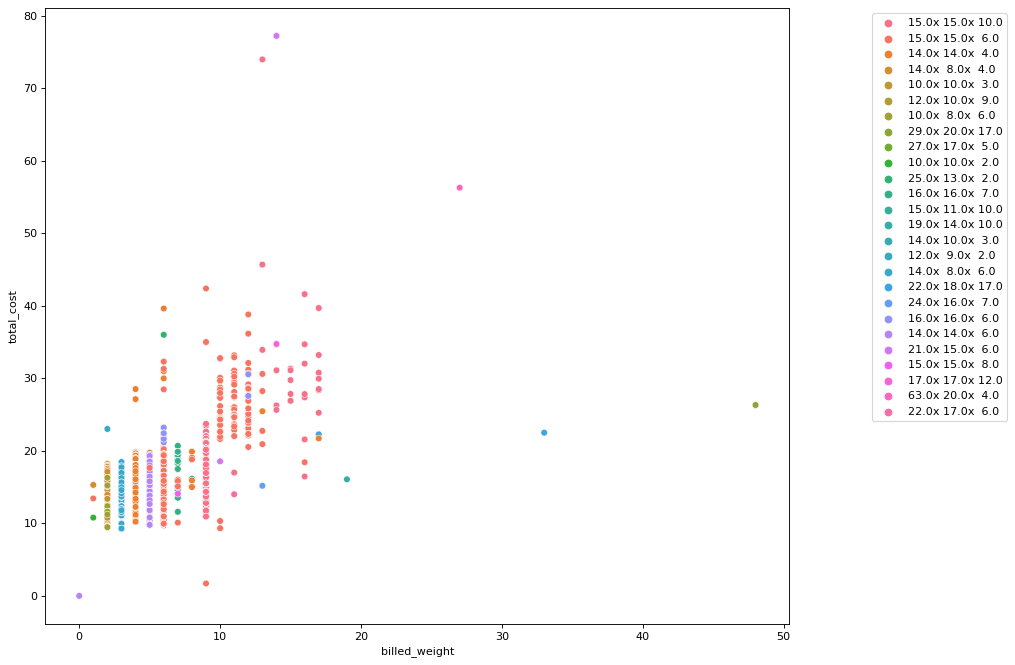

In [57]:
# Full Year Scatter Plot

figure(figsize=(12, 10), dpi=80);

sns.scatterplot(x='billed_weight',
               y = 'total_cost',
               hue = 'detail_keyed_dim',
               data = df_clean);

plt.legend(loc='best', bbox_to_anchor=(.7, 0., .6, 1));

## Monthly Error Rate Analysis

In [59]:
# Adjustment Rate By Month
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
error_rate = []
df = df_clean.copy()

for month in months:
    df = df_clean.copy()
    df = df[df['transaction_date'].dt.strftime('%m') == month]
    df_error = df[df['adjustment'] != 0]
    df_expected = df[df['adjustment'] == 0]
    error_rate1 = (df_error.shape[0] / (df_expected.shape[0]+.01))*100
    error_rate.append(error_rate1)

zipped = list(zip(months, error_rate))
df_error_rate = pd.DataFrame(zipped, columns = ['month', 'error_rate'])
df_error_rate

,month,error_rate
0,01,3.885025
1,02,0.839891
2,03,0.761900
3,04,0.819220
4,05,0.859214
5,06,0.976134
6,07,0.561222
7,08,0.531441
8,09,0.396598
9,10,0.174291


## Filters (Date, Outliers, Error Shipments)

In [80]:
# Filter by Date 
df = df_clean.copy()

# Year
df = df[df['transaction_date'].dt.strftime('%Y') == '2022']

# Month
df = df[df['transaction_date'].dt.strftime('%m') >= '10']
#df = df[df['transaction_date'].dt.strftime('%m') == '10']

# outliers 
# df = df[df['total_cost'] <= 60]

# adjustments
# df = df[df['adjustment'] <= 0]

# Export to CSV 
# df.to_csv('count_request_quarter.csv', header=True, index=False)

print("Number of shipments in this parameter:", df.shape[0])

# view 
df.tail()

Number of shipments in this parameter: 5147


,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1,billed_weight,package_quantity,zone,receiver_city,receiver_state,receiver_postal,fuel_cost,detail_keyed_dim,total_cost,adjustment,distance_mi,week_of_year,month,volume
23146,1ZR4R346YW90206252,2022-10-03,UPS SurePost - 1 LB or Greater,21.45,-4.29,17.16,3158371,9.0,1,7.0,FAIRFIELD,CT,68252,2.40,15.0x 15.0x 10.0,17.16,0.0,NaN,40,10,2250.0
23165,1ZR4R346YW91364679,2022-10-03,UPS SurePost - 1 LB or Greater,24.59,-3.96,20.63,3158472,9.0,1,6.0,SALVIA,KY,40372,2.89,15.0x 15.0x 10.0,20.63,0.0,1742.89,40,10,2250.0
23012,1ZR4R346YW90216590,2022-10-03,UPS SurePost - 1 LB or Greater,22.32,-3.67,18.65,3158382,6.0,1,6.0,MANCHESTER,MI,48158,2.61,15.0x 15.0x 6.0,18.65,0.0,1768.95,40,10,1350.0
23144,1ZR4R346YW90137854,2022-10-03,UPS SurePost - 1 LB or Greater,19.33,-3.86,15.47,3158487,6.0,1,7.0,WATERTOWN,MA,24724,2.16,15.0x 15.0x 6.0,15.47,0.0,2062.74,40,10,1350.0
3356,1ZR4R346YW96160746,2022-10-03,UPS SurePost - 1 LB or Greater,23.28,-3.86,19.42,3158426,6.0,1,7.0,WOODSTOCK,NY,12498,2.71,15.0x 15.0x 6.0,19.42,0.0,2587.19,40,10,1350.0


### Normal Shipments

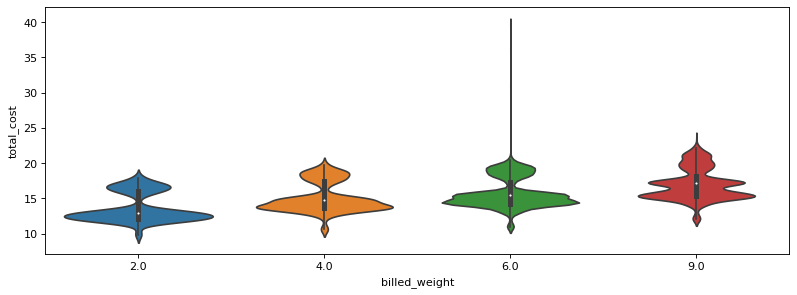

In [61]:
# Normal UPS Shipments
normal_billing_weight = [2.0, 3.0, 4.0, 6.0, 9.0]

df_common = df[df['billed_weight'].isin(normal_billing_weight)]
figure(figsize=(12, 4), dpi=80);
ax = sns.violinplot(x="billed_weight", y="total_cost", data = df_common)

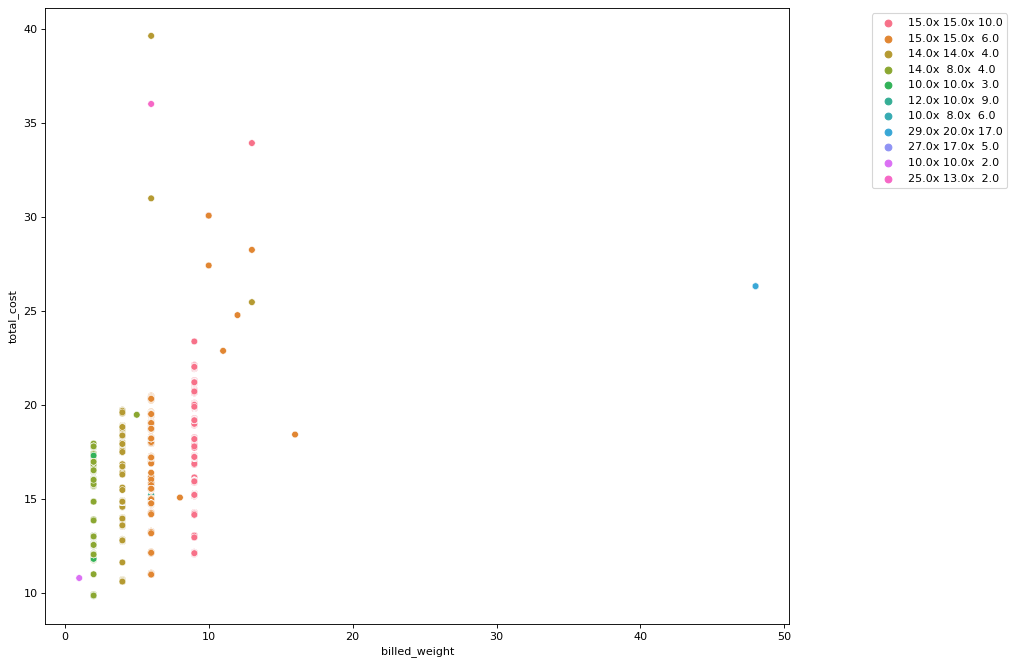

In [63]:
# Additional Filter
#df = df[df['Total Cost'] <= 40]

# Scatter Plot
figure(figsize=(12, 10), dpi=80);

sns.scatterplot(x='billed_weight',
               y = 'total_cost',
               hue = 'detail_keyed_dim',
               data = df);

plt.legend(loc='best', bbox_to_anchor=(.7, 0., .6, 1));

### Normal Box Size Shipments Averages (Filters Defined Above)

In [64]:
# Average Costs of Normal Shipments 
df_common.groupby(by=['billed_weight']).mean()

,published_charge,incentive_charge,net_charge,zone,fuel_cost,total_cost,adjustment,distance_mi,volume
billed_weight,,,,,,,,,
2.0,16.783116,-3.096493,13.686623,5.624796,1.974290,13.686623,0.000000,1689.166277,436.606852
4.0,18.591836,-3.483308,15.108528,5.703633,2.179111,15.108528,0.000000,1709.643072,784.000000
6.0,19.423055,-3.652010,15.771045,5.687781,2.276055,15.782527,0.011482,1710.612140,1349.635779
9.0,20.954808,-3.972172,16.982636,5.700281,2.456055,16.998607,0.015971,1711.600020,2248.732989


### Error Shipments (Filters Defined Above)

In [65]:
# Not a standard box size 
df_error = df[~df['billed_weight'].isin(normal_billing_weight)]
df_error = df_error.drop_duplicates(subset=['tracking_number'])
df_error.groupby(by=['billed_weight']).mean()

,published_charge,incentive_charge,net_charge,zone,fuel_cost,total_cost,adjustment,distance_mi,volume
billed_weight,,,,,,,,,
1.0,13.490000,-2.700000,10.790000,5.000000,1.530000,10.790000,0.000000,1015.560000,NaN
5.0,3.120000,-0.620000,2.500000,7.000000,2.430000,19.470000,16.970000,2332.510000,448.000000
8.0,1.060000,-0.210000,0.850000,5.000000,2.020000,15.070000,14.220000,1503.670000,1350.000000
10.0,12.100000,0.250000,12.350000,5.333333,2.616667,29.180000,16.830000,1212.903333,1350.000000
11.0,16.570000,-3.310000,13.260000,4.000000,1.930000,22.870000,9.610000,931.160000,1350.000000
12.0,17.730000,-3.550000,14.180000,5.000000,1.980000,24.770000,10.590000,1538.930000,1350.000000
13.0,17.666667,-1.523333,16.143333,5.333333,2.380000,29.206667,13.063333,1604.816667,1461.333333
16.0,11.370000,-8.160000,3.210000,6.000000,2.210000,18.420000,15.210000,1788.500000,1350.000000
48.0,48.720000,-22.410000,26.310000,5.000000,3.820000,26.310000,0.000000,0.000000,NaN


### Adjustments (Filters Defined Above) -- All Box Sizes

In [58]:
# view adjustments 
df_adj = df_clean[df_clean['adjustment'] != 0]
df_adju = df_adj.drop_duplicates(keep='first')
df_adj = df_adj.sort_values(by=['transaction_date'], ascending=False)
df_adj.head()

## export adjustments to csv for analysis 
#df_adju.to_csv('ups_adjustments.csv', header=True, index=False)

,tracking_number,transaction_date,service_code,published_charge,incentive_charge,net_charge,ref_no_1,billed_weight,package_quantity,zone,receiver_city,receiver_state,receiver_postal,fuel_cost,detail_keyed_dim,total_cost,adjustment,distance_mi,week_of_year,month,volume
23345,1ZR4R346YW96552877,2022-11-28,UPS SurePost - 1 LB or Greater,16.57,-3.31,13.26,3165304,11.0,1,4.0,MESA,AZ,85204,1.93,15.0x 15.0x 6.0,22.87,9.61,931.16,48,11,1350.0
25009,1ZR4R346YW92978531,2022-11-25,UPS SurePost - 1 LB or Greater,19.50,-3.89,15.61,3164348,9.0,1,7.0,TOMS RIVER,NJ,87553,2.30,15.0x 15.0x 6.0,17.30,1.69,396.19,47,11,1350.0
24243,1ZR4R346YW97560106,2022-11-22,UPS SurePost - 1 LB or Greater,21.41,-3.32,18.09,3163011,13.0,1,4.0,COLORADO CITY,AZ,86021,2.66,15.0x 15.0x 6.0,28.24,10.15,766.10,47,11,1350.0
16122,1ZR4R346YW96700420,2022-11-21,UPS SurePost - 1 LB or Greater,17.06,-3.41,13.65,3163886,13.0,1,5.0,LONG BEACH,CA,90808,2.01,14.0x 14.0x 4.0,25.46,11.81,1344.23,47,11,784.0
24434,1ZR4R346YW99491179,2022-11-14,UPS SurePost - 1 LB or Greater,7.50,1.82,9.32,3162844,10.0,1,4.0,GOLD CANYON,AZ,85118,2.66,15.0x 15.0x 6.0,27.41,18.09,911.96,46,11,1350.0


In [78]:
# State Data
df[['receiver_state', 'zone', 'fuel_cost', 'total_cost', 'distance_mi']].groupby('receiver_state').mean().sort_values(['distance_mi'],ascending=True)

,zone,fuel_cost,total_cost,distance_mi
receiver_state,,,,
CO,2.154930,1.821831,12.571268,81.476972
WY,3.166667,2.391667,16.527500,484.215833
NM,3.625000,2.216875,15.219375,554.921875
UT,4.000000,2.030536,14.031607,623.258929
NE,3.878788,2.264848,15.604848,671.177576
SD,3.636364,2.199091,15.270909,694.924545
KS,3.880952,2.165714,14.956667,737.152857
OK,3.977778,2.284000,15.730444,813.897556
AZ,4.000000,2.056186,14.404068,931.759746


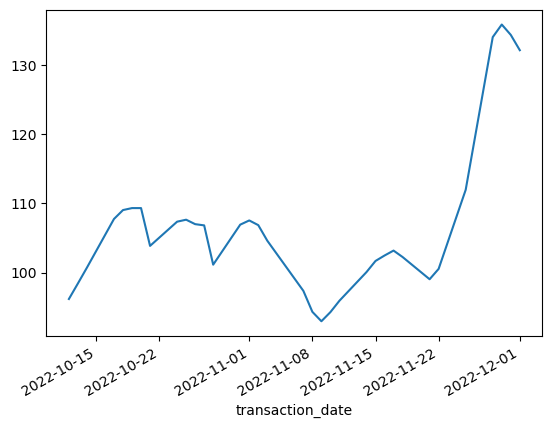

In [69]:
# Rolling Mean of number of shipments
shipments_by_day = df[['transaction_date','tracking_number']].groupby(by='transaction_date').count()#.plot(legend=False);
shipments_by_day['rolling'] = shipments_by_day['tracking_number'].rolling(28).mean()
shipments_by_day['rolling'].plot(legend=False);

In [72]:
box_mean = df.groupby(['month','detail_keyed_dim']).mean()
box_mean

published_charge  incentive_charge  net_charge  \
month detail_keyed_dim                                                   
09    10.0x  8.0x  6.0         18.366667         -3.100000   15.266667   
      10.0x 10.0x  2.0         13.490000         -2.700000   10.790000   
      10.0x 10.0x  3.0         16.818235         -3.071176   13.747059   
      14.0x  8.0x  4.0         16.676805         -3.090355   13.586450   
      14.0x 14.0x  4.0         18.477895         -3.494398   14.983496   
      15.0x 15.0x  6.0         19.283252         -3.633067   15.650184   
      15.0x 15.0x 10.0         21.161212         -3.963960   17.197253   
      25.0x 13.0x  2.0         31.540000         -4.955000   26.585000   
      27.0x 17.0x  5.0         24.640000         -3.970000   20.670000   
10    10.0x  8.0x  6.0         16.818333         -3.080000   13.738333   
      10.0x 10.0x  3.0         16.606190         -3.122857   13.483333   
      14.0x  8.0x  4.0         16.941989         -3.081934   13.860055   
      14.0x 14.0x  4.0         18.592947         -3.459184   15.133763   
      15.0x 15.0x  6.0         19.390087         -3.644744   15.745342   
      15.0x 15.0x 10.0         20.944299         -3.970910   16.973388   
      29.0x 20.0x 17.0         48.720000        -22.410000   26.310000   
11    10.0x  8.0x  6.0         16.342500         -3.070000   13.272500   
      10.0x 10.0x  3.0         16.860000         -3.135833   13.724167   
      12.0x 10.0x  9.0         21.720000         -6.510000   15.210000   
      14.0x  8.0x  4.0         16.656468         -3.100448   13.556020   
      14.0x 14.0x  4.0         18.668582         -3.499378   15.169204   
      15.0x 15.0x  6.0         19.455741         -3.653410   15.802331   
      15.0x 15.0x 10.0         20.898811         -3.980584   16.918227   
12    14.0x 14.0x  4.0         21.000000         -3.400000   17.600000   
      15.0x 15.0x  6.0         16.043333         -2.943333   13.100000   
      15.0x 15.0x 10.0         18.832000         -3.618000   15.214000   

                            zone  fuel_cost  total_cost  adjustment  \
month detail_keyed_dim                                                
09    10.0x  8.0x  6.0  5.666667   2.180000   15.266667    0.000000   
      10.0x 10.0x  2.0  5.000000   1.530000   10.790000    0.000000   
      10.0x 10.0x  3.0  5.529412   1.953529   13.747059    0.000000   
      14.0x  8.0x  4.0  5.733728   1.947988   13.686864    0.100414   
      14.0x 14.0x  4.0  5.793233   2.131992   15.053947    0.070451   
      15.0x 15.0x  6.0  5.725153   2.236184   15.713865    0.063681   
      15.0x 15.0x 10.0  5.741414   2.447758   17.232061    0.034808   
      25.0x 13.0x  2.0  6.000000   2.010000   33.035000    6.450000   
      27.0x 17.0x  5.0  6.000000   2.930000   20.670000    0.000000   
10    10.0x  8.0x  6.0  5.500000   1.958333   13.738333    0.000000   
      10.0x 10.0x  3.0  5.857143   1.927619   13.483333    0.000000   
      14.0x  8.0x  4.0  5.530387   1.989448   13.860055    0.000000   
      14.0x 14.0x  4.0  5.613158   2.165237   15.178421    0.044658   
      15.0x 15.0x  6.0  5.670203   2.261099   15.783896    0.038554   
      15.0x 15.0x 10.0  5.705970   2.434358   16.973388    0.000000   
      29.0x 20.0x 17.0  5.000000   3.820000   26.310000    0.000000   
11    10.0x  8.0x  6.0  5.250000   1.942500   13.272500    0.000000   
      10.0x 10.0x  3.0  5.833333   2.007500   13.724167    0.000000   
      12.0x 10.0x  9.0  4.000000   2.210000   15.210000    0.000000   
      14.0x  8.0x  4.0  5.606965   1.987711   13.556020    0.000000   
      14.0x 14.0x  4.0  5.731343   2.223010   15.198582    0.029378   
      15.0x 15.0x  6.0  5.681205   2.315702   15.833688    0.031356   
      15.0x 15.0x 10.0  5.684046   2.476840   16.918227    0.000000   
12    14.0x 14.0x  4.0  5.000000   2.560000   17.600000    0.000000   
      15.0x 15.0x  6.0  2.666667   1.903333   13.100000    0.000000   
      15.0x 15.0x 10.0  4.200000  